#Data Augmentation

A common problem is the amount of data available to enter the models, for these to present the expected results it is necessary that the training occurs with a large amount of data (dataset), but in many cases there is no the data needed to perform these tasks.
This is where the ** Data Augmentation ** technique comes in, which, as its name indicates, allows us to augment our dataset in two ways:




*   Introducing perturbations in the original data. For example: taking an original image centered, we replicate it off-center, inverting axes ...
*   Using different distributions. Example: if we want to train a model to classify high resolution images, we add low resolution images, with noise… always maintaining the highest proportion of high resolution.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

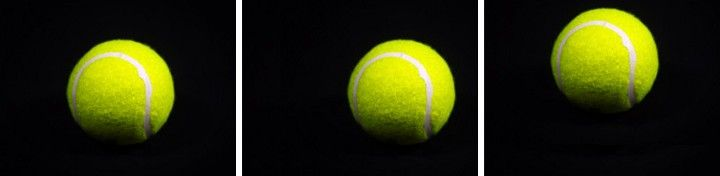



La misma pelota con algunas traslaciones



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:



1. Turn (Flip)
2. Rotation


1. Scale
2. Trim


1. Translation
2. Gaussian noise









The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



*   The changes in the image (translations) through the arguments **width_shift_range** y **height_shift_range**.
*  Turning the image around using the arguments **horizontal_flip** y **vertical_flip**.
*   Image rotations through storyline **rotation_range**
*   Image brightness by argument **brightness_range**.
*   Image zoom using the argument **zoom_range**.


Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.


In [8]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                  #Library that allows working with arrangement  
from numpy import expand_dims       #Expand the array shape 
from keras.preprocessing.image import load_img    #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values ​​within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #class that takes original data, transforms it randomly and returns only the new transformed data
from PIL import Image #python image library
from urllib.request import urlopen #Lets you read an email address



First we upload an image from the internet


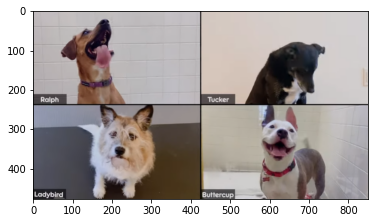

In [9]:
url = 'https://www.milenio.com/uploads/media/2020/05/12/perritos-en-zoom-youtube.png' 
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)


Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.

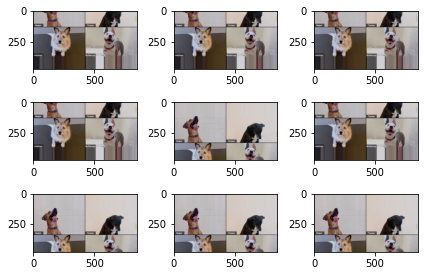

In [10]:
# We convert the image to an arrangement
data = img_to_array(img)
# we make an expansion to a sample 
samples = expand_dims(data, 0)
# We create the data augmenter using only image change 
datagen = ImageDataGenerator(height_shift_range=[-100,100])
# we prepare the iterator
it = datagen.flow(samples, batch_size=1)
# we generate samples and display the results
for i in range(9):
	plt.subplot(330 + 1 + i)
	# batches of images are generated
	batch = it.next()
	image = batch[0].astype('uint8') #it is converted to a valid value to be able to display it as an image
	plt.imshow(image)
	plt.tight_layout()
plt.show()


An image flip means to reverse the rows or columns of pixels in the case of a vertical or horizontal flip, respectively.
The increase is specified by a Boolean argument **horizontal_flip** or **vertical_flip** for the class **ImageDataGenerator**.

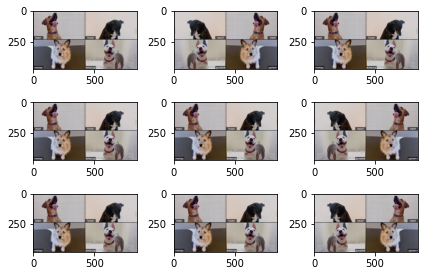

In [11]:
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is sampled uniformly at random from the zoom region for each dimension (width, height) separately.

Floating or [limite inferior, limite superior]. Range for random zoom. If it is a floater, [limite inferior, limite superior] = [1-zoom_range, 1 + zoom_range]

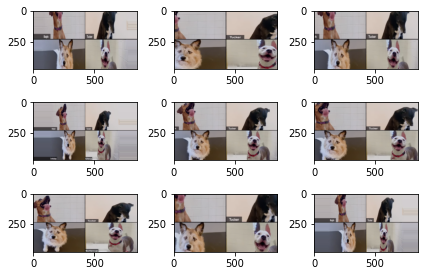

In [12]:
datagen = ImageDataGenerator(zoom_range=0.5) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The image is randomly rotated clockwise a specified number of degrees from 0 to 360. It is likely to rotate pixels outside of the image frame, leaving areas of the frame with no pixel data, which need to be filled.

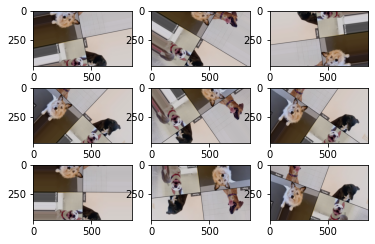

In [13]:
datagen = ImageDataGenerator(rotation_range=180)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data in the dataset to be used, in many jobs a data augmentation is used to increase the amount of training images and improve the precision of the job.


              featurewise_center: Boleano, poner la media de cada elemento en cero de todos los datos.
              samplewise_center**: Boleano, poener la media del cada muestra a cero
              featurewise_std_normalization: Boleano, Divida las entradas por la desviación estándar (std.) del conjunto de datos, según las características.
              samplewise_std_normalization: Boleano, divide cada dato por su std.
              zca_epsilon: El valor predeterminado es 1e-6.
              zca_whitening: Boleano, indica si se aplica el blanqueo ZCA.      

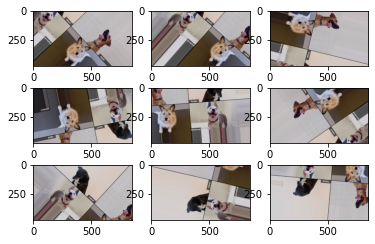

In [14]:
datagen = ImageDataGenerator(
            rotation_range               = 90,
            width_shift_range            = [100,100],   
            height_shift_range           = [100,100],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now we consider words, the necessary work is not so simple given the inherent complexity of the language (we cannot replace each word by its synonym and even if we do, we run the risk that the meaning of the sentence changes completely.
There are some libraries that can help us to carry out this task, we will start by analyzing the following:


1. Text Attack
2. Google Trans

# These are functionds for ImageDataGenerator

**directory:** string, path to the target directory. It should contain one subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images inside each of the subdirectories directory tree will be included in the generator.

**target_size:** Tuple of integers (height, width), defaults to (256, 256). The dimensions to which all images found will be resized.

**color_mode:** One of "grayscale", "rgb", "rgba". Default: "rgb". Whether the images will be converted to have 1, 3, or 4 channels.

**classes:** Optional list of class subdirectories (e.g. ['dogs', 'cats']).

**class_mode:** One of "categorical", "binary", "sparse", "input", or None.

**batch_size:** Size of the batches of data (default: 32).

**save_to_dir:** None or str (default: None). This allows you to optionally specify a directory to which to save the augmented pictures being generated 

**save_prefix:** Str. Prefix to use for filenames of saved pictures (only relevant if save_to_dir is set).

**save_format:** One of "png", "jpeg" (only relevant if save_to_dir is set).Default: "png".

**subset:** Subset of data ("training" or "validation") if validation_split is set in ImageDataGenerator.

# TextAttack
It is a Python framework for adversary attacks, adversary training, and data augmentation in NLP. We will focus only on data augmentation.

In [15]:
!pip install textattack

     |████████████████████████████████| 327kB 15.7MB/s 
     |████████████████████████████████| 1.1MB 42.2MB/s 
     |████████████████████████████████| 245kB 52.7MB/s 
     |████████████████████████████████| 1.7MB 52.2MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
     |████████████████████████████████| 778kB 51.6MB/s 
     |████████████████████████████████| 3.0MB 48.8MB/s 
     |████████████████████████████████| 317kB 62.5MB/s 
     |████████████████████████████████| 686kB 54.4MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
     |████████████████████████████████| 153kB 55.7MB/s 
     |████████████████████████████████| 102kB 13.7MB/s 
     |████████████████████████████████| 235kB 62.6MB/s 
     |████████████████████████████████| 1.1MB 56.9MB/s 
     |████████████████████████████████| 890kB 53.4MB/s 
     |████████████████████████████████| 276kB 61.1MB/s 
     |████████████████████████████████| 798kB 53.8MB/s 
     |████████████████████████████████| 983kB 49.4MB

In [17]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

In [19]:
text = "Hello"

TextAttack provides us with four methods for data augmentation.


## WordNetAugmenter
Augments the text by replacing it with synonyms from the WordNet thesaurus (thesaurus).

WordNet is a lexical database for English. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept.
WordNet superficially resembles a thesaurus in that it groups words based on their meaning.



In [21]:
aug = WordNetAugmenter();
aug.augment(text)

['hi']


## EmbeddingAugmenter
 Augment text by transforming words with their inlays, with a constraint to ensure that their cosine similarity is at least 0.8.


In [22]:
aug = EmbeddingAugmenter();
aug.augment(text)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:42<00:00, 11.3MB/s]
textattack: Unzipping file /root/.cache/textattack/tmp9fobs4qt.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


['Bonjour']

## CharSwapAugmenter
Augment text by substituting, deleting, inserting, and swapping adjacent characters.

In [23]:
aug = CharSwapAugmenter()
aug.augment(text)

['HVllo']


## EasyDataAugmenter
This augments the text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym insertions. All these 4 functionalities occur randomly. So we will get different results every time we run the code. This returns 4 augmented results, unlike the other methods.


In [24]:
aug = EasyDataAugmenter()
aug.augment(text)

['Hello', 'how-do-you-do', 'Hello', 'Hello hi']


Googletrans uses the Google Translate Ajax API for language detection and translation.


The key parameters for the method **translate ()** They are:



1.   **src**: Source language. this parameter is optional since**googletrans** lo detectará.
2.   **dest**: target language. Mandatory parameter.

1.   **text**: the text to be translated from the source language to the target language. Mandatory parameter.




 



When using this method what happens is a retranslation, we go from the original language to a target language and then we return to the original, during this backtranslation, there is a slight change in the sentence between the original text and the backtranslated text, but the general meaning of the sentence is still preserved.


Supported languages ​​can be found at https://cloud.google.com/translate/docs/languages?hl=es


To obtain the best results it is recommended to do some tests with the languages, if the target language is very similar, the translation does not lose information, however there may be the problem that the translation is too literal, this becomes a bit of a problem. try and failure.


Some examples of languages:


* Afrikaans 'af'

* Chinese (simplified) 'zh-CN or zh'

* Esperanto 'eo'

* Japanese 'ja'

* Latin 'la'


*   Spanish 'es'


* Turkmen 'tk'


* Yiddish 'yi'

* Zulu 'zu'



In [25]:
!pip install googletrans

     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 972kB 13.1MB/s 
     |████████████████████████████████| 71kB 10.7MB/s 
     |████████████████████████████████| 61kB 10.7MB/s 
     |████████████████████████████████| 102kB 13.4MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=c7dfc92e49cd7a352fb0df4bb19823e89271a8a5aa7053dfbf3ea8b329b75650
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=15a575433e28e2e7adc11a9d4263326ca8ff16ee0d0a433254100b262f80a5ac
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [28]:
from googletrans import Translator
translator = Translator()

In [31]:
origin_text = "Estoy feliz"
text_trans = translator.translate(text=origin_text, dest='af').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

Estoy feliz
ek is gelukkig
I am happy
